In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np 

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv('Salary_Data - Salary_Data.csv')

In [8]:
df.info

<bound method DataFrame.info of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872>

In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


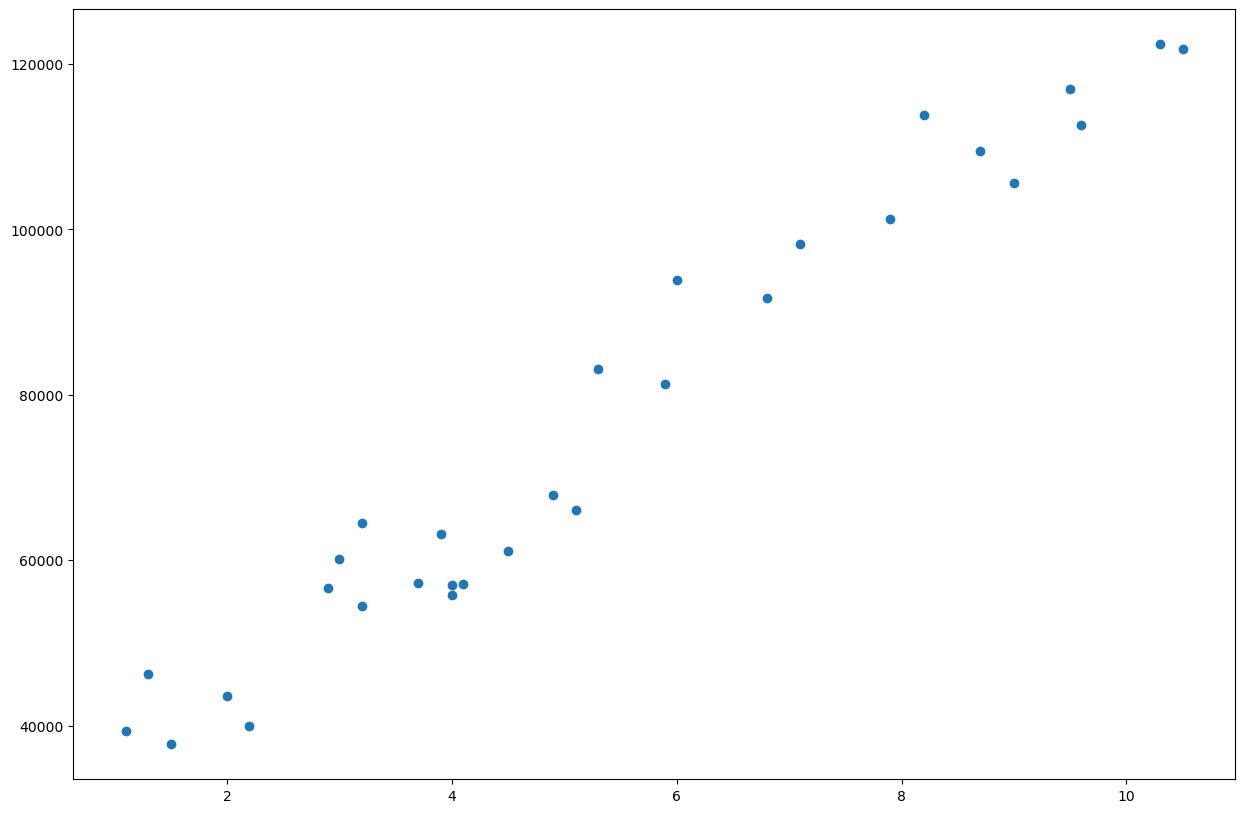

In [10]:
plt.figure(figsize = (15,10))
plt.scatter(df['YearsExperience'], df['Salary'])

In [11]:
X = df[['YearsExperience']]
y = df[['Salary']]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [16]:
lr.fit(X_train , y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test)


In [18]:
lr.coef_

array([[9158.13919873]])

In [19]:
lr.intercept_

array([26137.2400142])

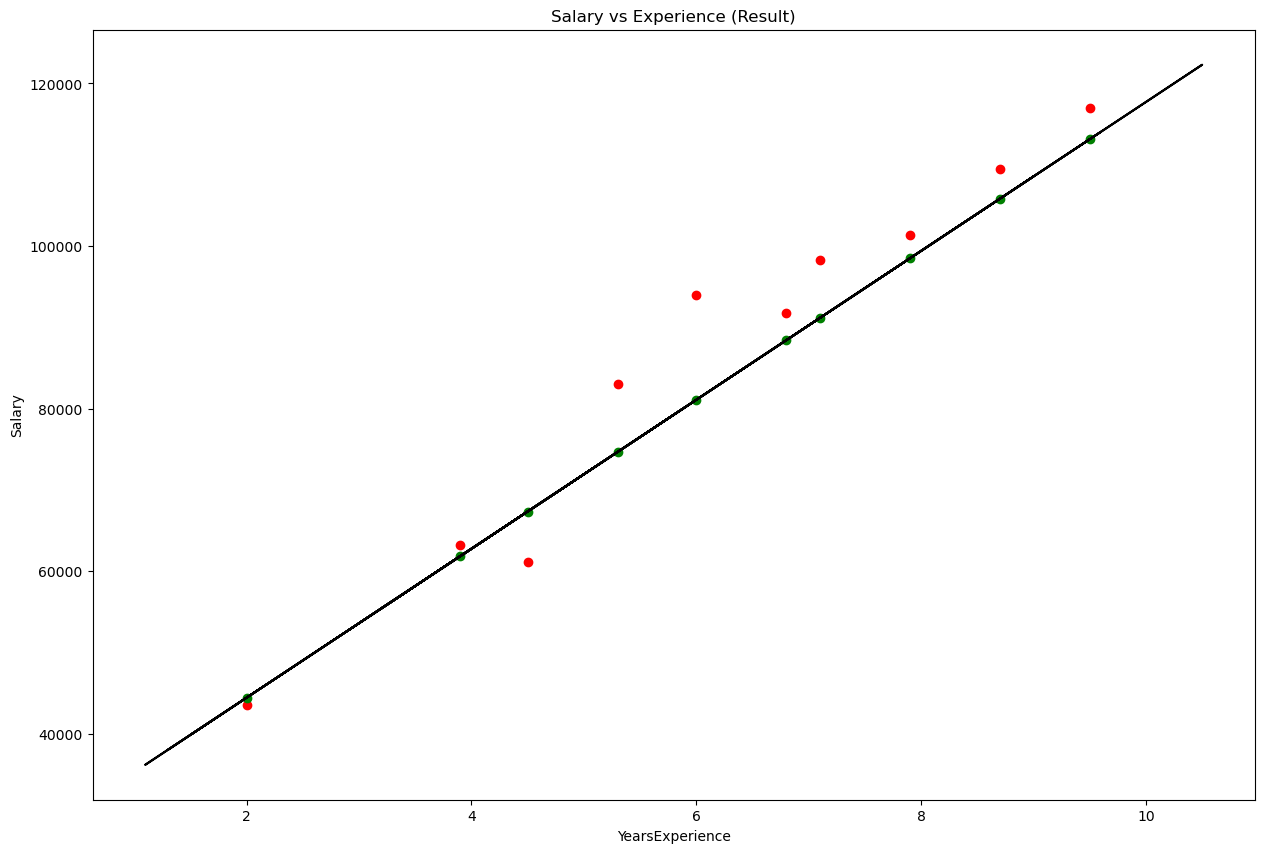

In [20]:
plt.figure(figsize = (15,10))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.plot(X_train, lr.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Result)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [21]:
import statsmodels.api as sm
X_stat = sm.add_constant(X_train)
regsummary = sm.OLS(y_train, X_stat).fit()
regsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     420.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           6.21e-14
Time:                        15:08:08   Log-Likelihood:                -200.98
No. Observations:                  20   AIC:                             406.0
Df Residuals:                      18   BIC:                             408.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.614e+04   2548.831     10.255      0.000    2.08e+04    3.15e+04
YearsExperience  9158.1392    446.425     20.514      0.000    8220.234    1.01e+04
==============================================================================
Omnibus:                        1.816   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.523
Skew:                           0.613   Prob(JB):                        0.467
Kurtosis:                       2.430   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from sklearn.metrics import r2_score

r2_score(y_train, lr.predict(X_train))

0.9589827355323256